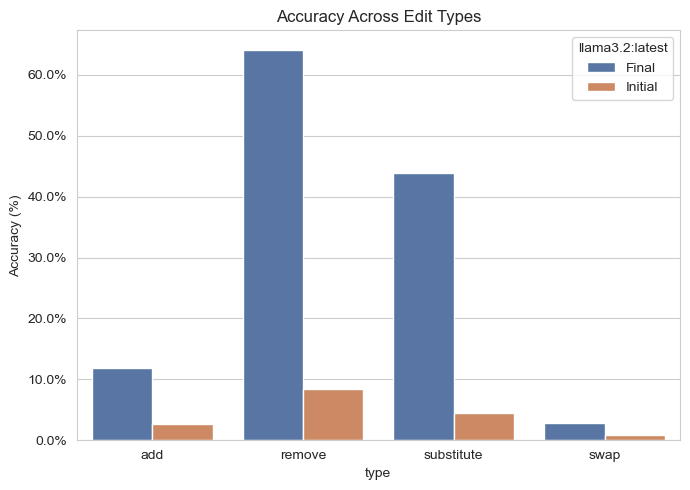

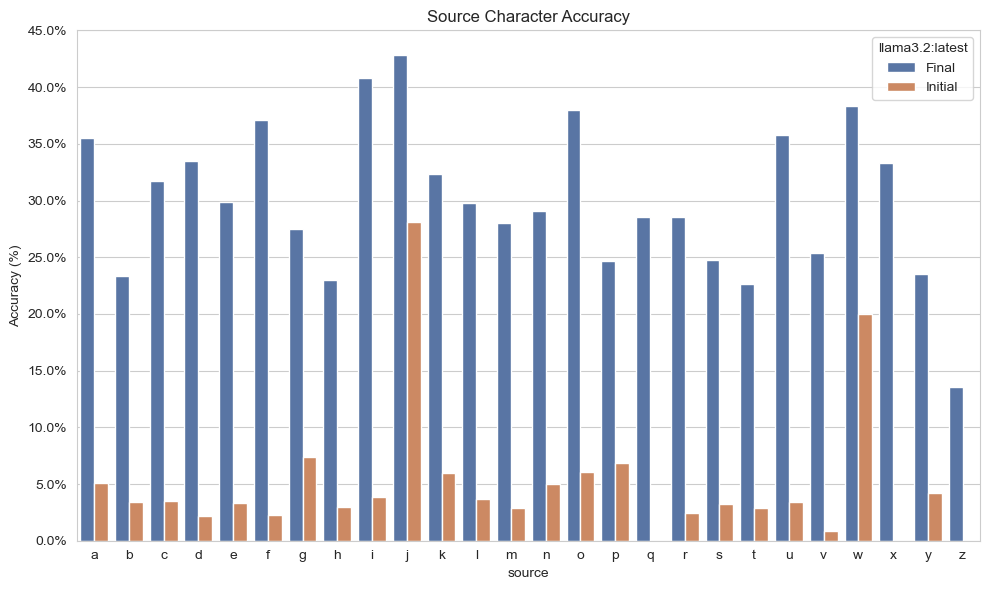

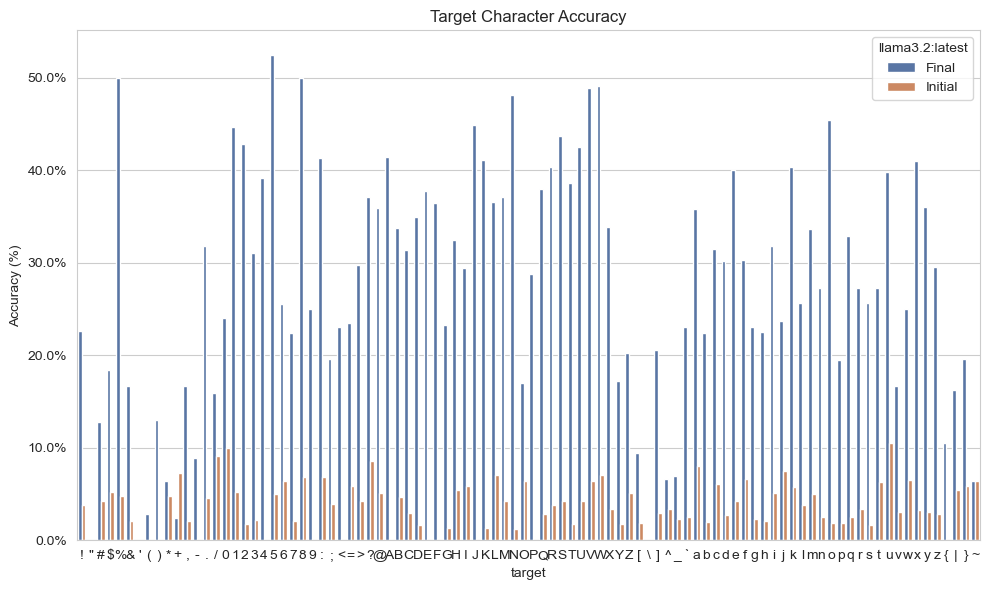

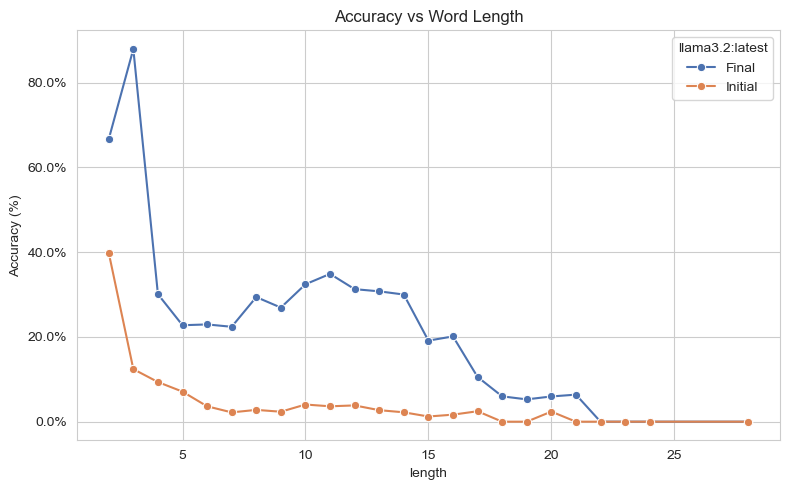

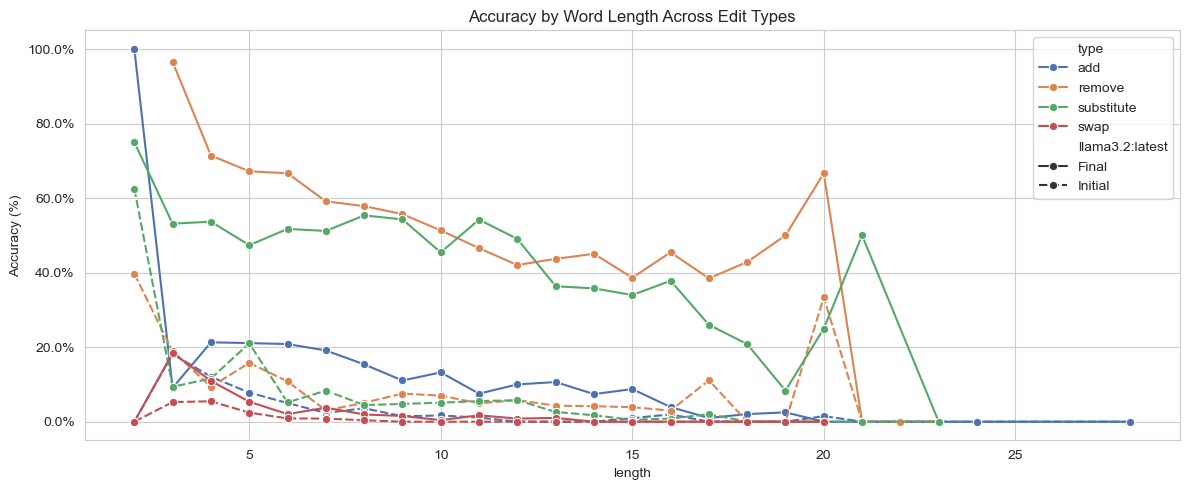

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File paths
initial_file = "llama32latest_2.json"
final_file = "llama3_2_test10k_addswap_finetuned.json"

def load_results(file):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read().strip()

        # Detect JSON array format
        if text.startswith("["):
            data = json.loads(text)
        else:
            data = [json.loads(line) for line in text.split("\n") if line.strip()]

    df = pd.DataFrame(data)

    # Fill missing cols
    for col in ["p_answer", "source", "target", "type", "length"]:
        if col not in df.columns:
            df[col] = None

    # Compute exact-match accuracy
    df["p_answer_clean"] = df["p_answer"].astype(str).str.replace(" ", "", regex=False)
    df["correct"] = (df["p_answer_clean"] == df["answer"])

    return df

df_initial = load_results(initial_file)
df_final = load_results(final_file)

df_initial["llama3.2:latest"] = "Initial"
df_final["llama3.2:latest"] = "Final"

df = pd.concat([df_initial, df_final], ignore_index=True)

sns.set_style("whitegrid")
sns.set_palette("deep")

# ------------------------------------
# Plot 1 — Accuracy Across Edit Types
# ------------------------------------
plt.figure(figsize=(7,5))
acc_edit = df.groupby(["llama3.2:latest", "type"])["correct"].mean().reset_index()
sns.barplot(data=acc_edit, x="type", y="correct", hue="llama3.2:latest")
plt.title("Accuracy Across Edit Types")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# Plot 2 — Source Character Accuracy Comparison
# ------------------------------------------------
plt.figure(figsize=(10,6))
src_acc = df.groupby(["llama3.2:latest", "source"])["correct"].mean().reset_index()
src_acc = src_acc[src_acc["source"].notna()]
sns.barplot(data=src_acc, x="source", y="correct", hue="llama3.2:latest")
plt.title("Source Character Accuracy")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.show()

# ------------------------------------------------
# Plot 3 — Target Character Accuracy Comparison
# ------------------------------------------------
plt.figure(figsize=(10,6))
tgt_acc = df.groupby(["llama3.2:latest", "target"])["correct"].mean().reset_index()
tgt_acc = tgt_acc[tgt_acc["target"].notna()]
sns.barplot(data=tgt_acc, x="target", y="correct", hue="llama3.2:latest")
plt.title("Target Character Accuracy")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.show()

# ------------------------------------
# Plot 4 — Accuracy by Word Length
# ------------------------------------
plt.figure(figsize=(8,5))
len_acc = df.groupby(["llama3.2:latest", "length"])["correct"].mean().reset_index()
len_acc = len_acc[len_acc["length"].notna()]
sns.lineplot(data=len_acc, x="length", y="correct", hue="llama3.2:latest", marker="o")
plt.title("Accuracy vs Word Length")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# Plot 5 — Word Length Accuracy per Operation Type
# -----------------------------------------------------------
plt.figure(figsize=(12,5))
len_edit_acc = df.groupby(["llama3.2:latest", "type", "length"])["correct"].mean().reset_index()
len_edit_acc = len_edit_acc[len_edit_acc["length"].notna()]
sns.lineplot(data=len_edit_acc, x="length", y="correct", hue="type", style="llama3.2:latest", marker="o")
plt.title("Accuracy by Word Length Across Edit Types")
plt.ylabel("Accuracy (%)")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.show()


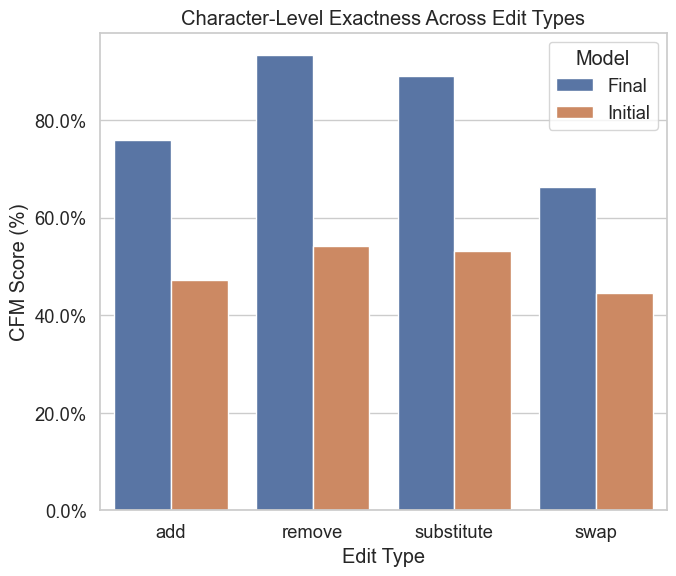

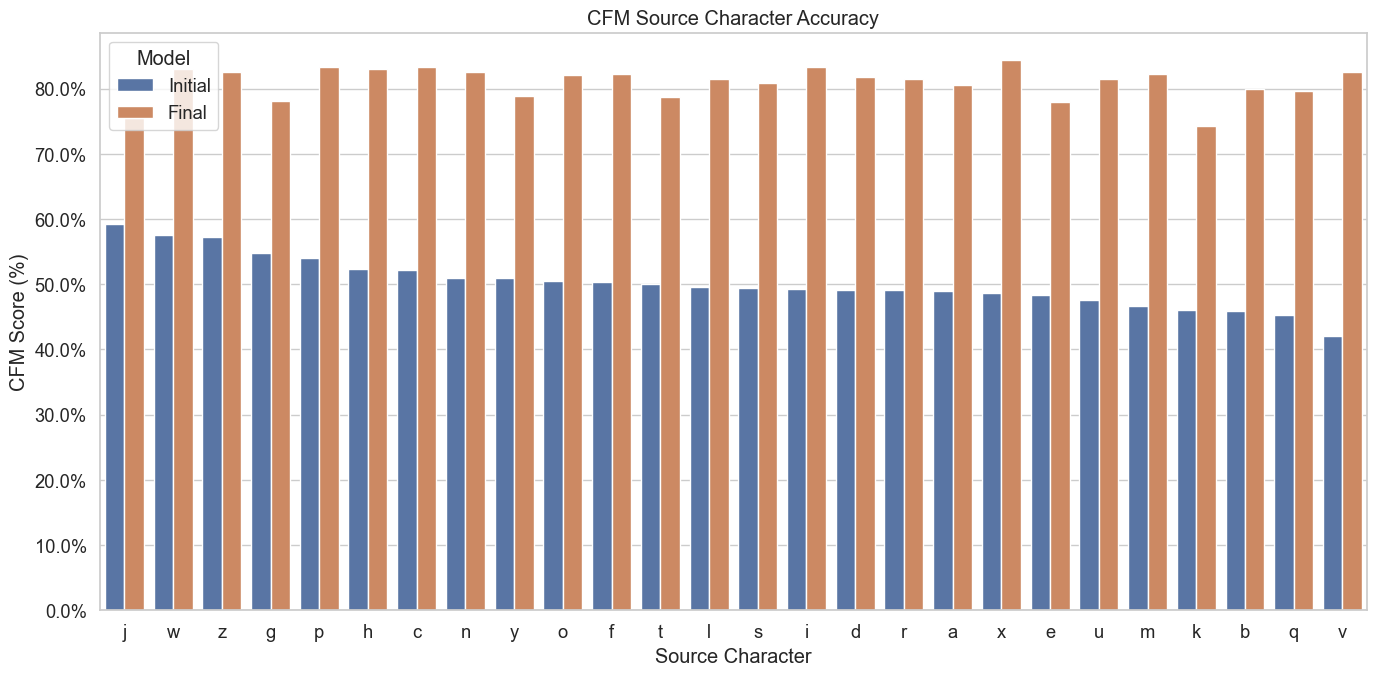

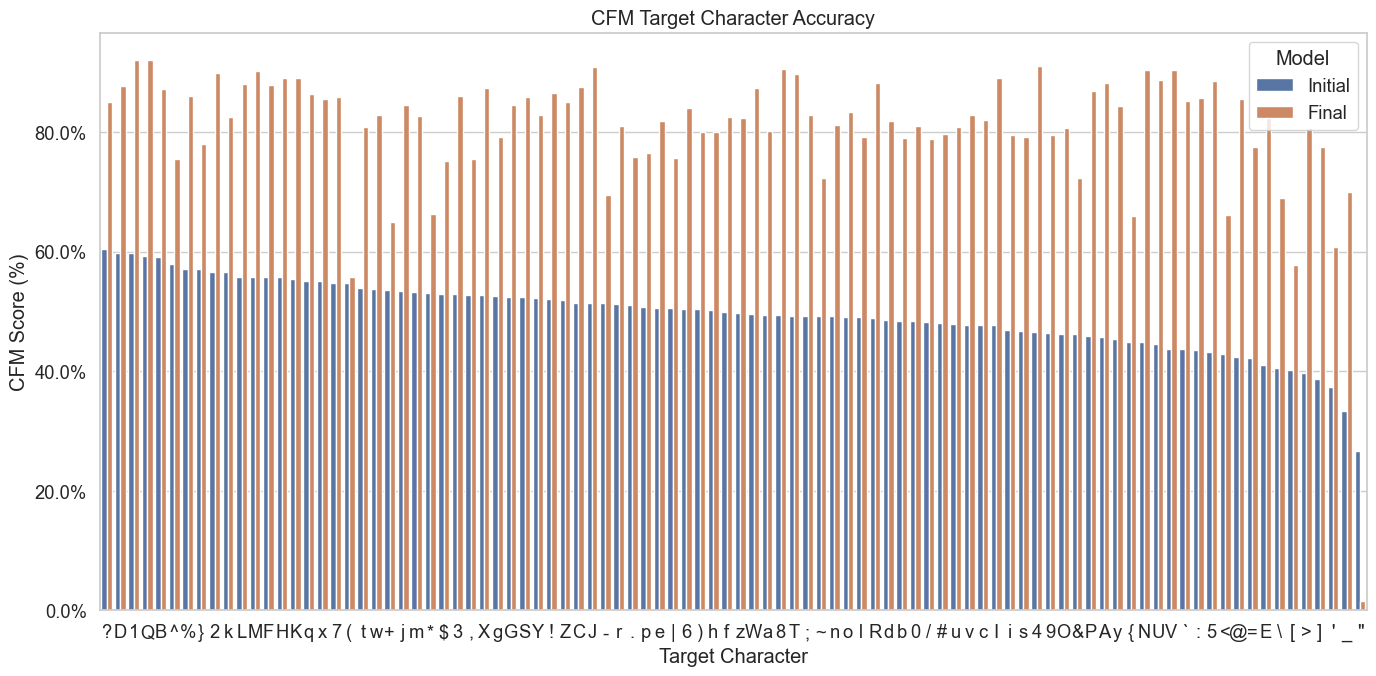

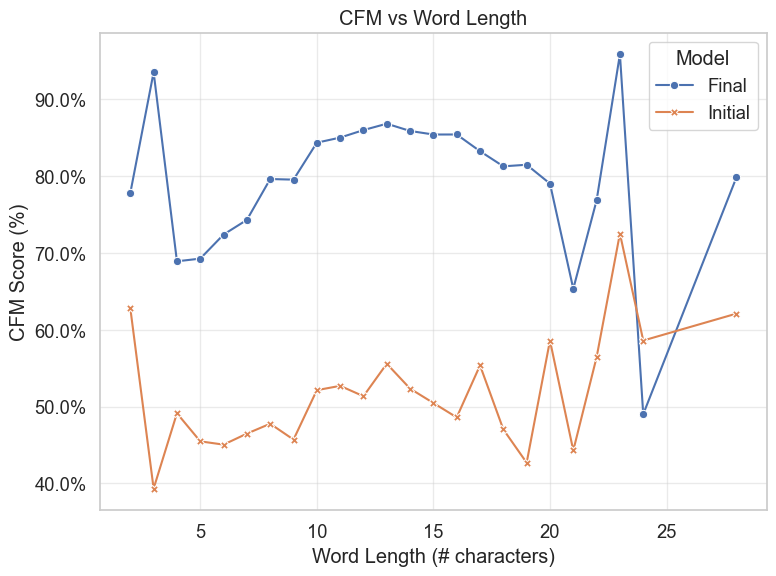


🎯 All updated CFM plots generated in 'plots/' folder!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load CSVs
df_edit = pd.read_csv("cfm_edit_type_summary.csv")
df_source = pd.read_csv("cfm_char_source_summary.csv")
df_target = pd.read_csv("cfm_char_target_summary.csv")
df_len = pd.read_csv("cfm_length_summary.csv")

# Rename model labels visually for plots
df_edit["Model"] = df_edit["Model"].replace({
    "Initial": "llama3.2:latest (Initial)",
    "Final": "llama3.2:latest (Final)"
})
df_source["Model"] = df_source["Model"].replace({
    "Initial": "llama3.2:latest (Initial)",
    "Final": "llama3.2:latest (Final)"
})
df_target["Model"] = df_target["Model"].replace({
    "Initial": "llama3.2:latest (Initial)",
    "Final": "llama3.2:latest (Final)"
})
df_len["Model"] = df_len["Model"].replace({
    "Initial": "llama3.2:latest (Initial)",
    "Final": "llama3.2:latest (Final)"
})

sns.set_theme(style="whitegrid", font_scale=1.2)
os.makedirs("plots", exist_ok=True)

# =============================
# Plot 1 — Edit Type CFM
# =============================
plt.figure(figsize=(7,6))
sns.barplot(data=df_edit, x="type", y="mean_cfm", hue="Model")
plt.ylabel("CFM Score (%)")
plt.xlabel("Edit Type")
plt.title("Character-Level Exactness Across Edit Types")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.savefig("plots/cfm_across_edit_types.png", dpi=350)
plt.show()

# =============================
# Plot 2 — Source Character CFM
# =============================
df_source_sorted = df_source.sort_values(["Model", "mean_cfm"], ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(data=df_source_sorted, x="source", y="mean_cfm", hue="Model")
plt.ylabel("CFM Score (%)")
plt.xlabel("Source Character")
plt.title("CFM Source Character Accuracy")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.savefig("plots/cfm_source_character.png", dpi=350)
plt.show()

# =============================
# Plot 3 — Target Character CFM
# =============================
df_target_sorted = df_target.sort_values(["Model", "mean_cfm"], ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(data=df_target_sorted, x="target", y="mean_cfm", hue="Model")
plt.ylabel("CFM Score (%)")
plt.xlabel("Target Character")
plt.title("CFM Target Character Accuracy")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.tight_layout()
plt.savefig("plots/cfm_target_character.png", dpi=350)
plt.show()

# =============================
# Plot 4 — CFM vs Word Length
# =============================
plt.figure(figsize=(8,6))
sns.lineplot(data=df_len, x="length", y="mean_cfm", hue="Model",
             style="Model", markers=True, dashes=False)
plt.ylabel("CFM Score (%)")
plt.xlabel("Word Length (# characters)")
plt.title("CFM vs Word Length")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.1f}%")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("plots/cfm_vs_word_length.png", dpi=350)
plt.show()

print("\n🎯 All updated CFM plots generated successfully with new model labels!")


In [2]:
print("Edit Type Columns:", df_edit.columns.tolist())
print("Source Columns:", df_source.columns.tolist())
print("Target Columns:", df_target.columns.tolist())
print("Length Columns:", df_len.columns.tolist())


Edit Type Columns: ['Model', 'type', 'exact_accuracy', 'mean_cfm']
Source Columns: ['Model', 'source', 'exact_accuracy', 'mean_cfm']
Target Columns: ['Model', 'target', 'exact_accuracy', 'mean_cfm']
Length Columns: ['Model', 'length', 'exact_accuracy', 'mean_cfm']
